In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
archivo_tsv = '/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/trabajo_practico_1/opiniones_de_clientes/para_borrar.tsv'

opiniones1 = pd.read_csv(archivo_tsv, sep='\t')
opiniones1 = opiniones1.drop(columns = ["Customer Value", "id", "¿Por que?", "Date of 1st Feedback Call", "Resultado del Primer contacto", "Descripción detallada del contacto", "Fuiste capaz de resolver el inconveniente?", "El cliente se encontró satisfecho con el resultado?"])
opiniones1

,Fecha de respuesta,Edad,Probabilidad de Recomendación
0,6/30/19 23:09,43,10.0
1,6/30/19 22:56,75,10.0
2,6/30/19 22:52,23,10.0
3,6/30/19 22:33,71,10.0
4,6/30/19 22:25,64,9.0
...,...,...,...
35821,1/1/19 8:48,63,10.0
35822,1/1/19 3:40,35,4.0
35823,1/1/19 2:04,41,10.0
35824,1/1/19 1:07,66,10.0


___

# 1) ¿Cuál es la probabilidad de que los servicios sean recomendados por los clientes con una calificación de 10 durante el 1er trimestre?

In [3]:
fechas = opiniones1["Fecha de respuesta"].value_counts()

In [4]:
borrando_valores = fechas[~fechas.isin(['Agradeció el llamado y se mostró conforme.'])]

In [5]:
opiniones1["Fecha de respuesta"].sort_index(ascending=False)

35825      1/1/19 0:47
35824      1/1/19 1:07
35823      1/1/19 2:04
35822      1/1/19 3:40
35821      1/1/19 8:48
             ...      
4        6/30/19 22:25
3        6/30/19 22:33
2        6/30/19 22:52
1        6/30/19 22:56
0        6/30/19 23:09
Name: Fecha de respuesta, Length: 35826, dtype: object

In [6]:
opiniones1['Probabilidad de Recomendación'].value_counts(normalize=True)

Probabilidad de Recomendación
10.0    0.450278
9.0     0.188910
8.0     0.163427
7.0     0.062044
0.0     0.038789
5.0     0.032743
6.0     0.021665
1.0     0.011397
4.0     0.010731
3.0     0.010413
2.0     0.009603
Name: proportion, dtype: float64

___

# 1) ¿Cómo fue evolucionando el total de respuestas de los clientes por mes a lo largo del primer semestre?

In [7]:
opiniones1

,Fecha de respuesta,Edad,Probabilidad de Recomendación
0,6/30/19 23:09,43,10.0
1,6/30/19 22:56,75,10.0
2,6/30/19 22:52,23,10.0
3,6/30/19 22:33,71,10.0
4,6/30/19 22:25,64,9.0
...,...,...,...
35821,1/1/19 8:48,63,10.0
35822,1/1/19 3:40,35,4.0
35823,1/1/19 2:04,41,10.0
35824,1/1/19 1:07,66,10.0


In [8]:
# Suponiendo que "opiniones1" es tu DataFrame original
# Convierte la columna "Fecha de respuesta" a formato de fecha y hora, tratando los errores como valores nulos
opiniones1["Fecha de respuesta"] = pd.to_datetime(opiniones1["Fecha de respuesta"], errors='coerce')

# Filtra las filas con fechas válidas (diferentes de NaN)
opiniones1 = opiniones1.dropna(subset=["Fecha de respuesta"])

# Ahora puedes continuar con el procesamiento de datos y gráficos sin preocuparte por valores de fecha no válidos.


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_16752/1375555446.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  opiniones1["Fecha de respuesta"] = pd.to_datetime(opiniones1["Fecha de respuesta"], errors='coerce')


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_16752/2168886138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opiniones1["Fecha de respuesta"] = pd.to_datetime(opiniones1["Fecha de respuesta"])


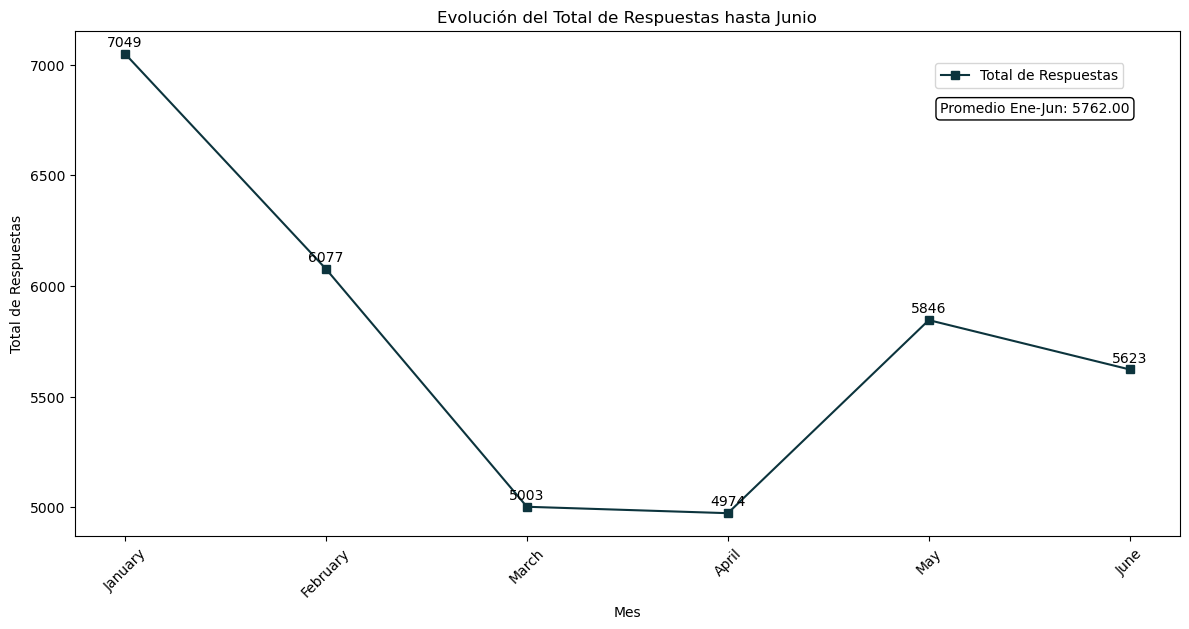

In [9]:
# Suponiendo que "opiniones1" es tu DataFrame original
# Convierte la columna "Fecha de respuesta" a formato de fecha y hora
opiniones1["Fecha de respuesta"] = pd.to_datetime(opiniones1["Fecha de respuesta"])

# Filtra los datos hasta junio
datos_hasta_junio = opiniones1[opiniones1["Fecha de respuesta"].dt.month <= 6]

# Agrupa por mes y calcula el total de respuestas
total_respuestas_por_mes = datos_hasta_junio.groupby(datos_hasta_junio["Fecha de respuesta"].dt.strftime('%B'))["Probabilidad de Recomendación"].count().reindex(['January', 'February', 'March', 'April', 'May', 'June'])

# Calcular el promedio de respuestas entre enero y junio
promedio_respuestas_enero_junio = total_respuestas_por_mes.mean()

# Crear un gráfico de líneas para mostrar la evolución del "Total de Respuestas" a través del tiempo
plt.figure(figsize=(12, 6))
plt.plot(total_respuestas_por_mes.index, total_respuestas_por_mes, marker='s', color='#0c343d', linestyle='-', label="Total de Respuestas")
plt.xlabel("Mes")
plt.ylabel("Total de Respuestas")
plt.title(f"Evolución del Total de Respuestas hasta Junio")

# Añadir etiquetas de valores un poco más arriba de cada punto
for i, valor in enumerate(total_respuestas_por_mes):
    plt.text(total_respuestas_por_mes.index[i], valor + 20, str(valor), ha="center", va="bottom")

# Añadir el promedio de respuestas en la esquina superior derecha del gráfico (más arriba)
plt.text(total_respuestas_por_mes.index[-1], promedio_respuestas_enero_junio + 1070, f"Promedio Ene-Jun: {promedio_respuestas_enero_junio:.2f}",
         ha="right", va="top", bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Mover la leyenda "Total de Respuestas" un poco hacia la izquierda (ajusta los valores según tu preferencia)
plt.legend(loc="upper right", bbox_to_anchor=(0.955,0.95))

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


___

    ➢ Conclusión:

    Podemos inferir que la cantidad de respuestas de los clientes fue mucho más grande en el mes de Enero y Febrero por el hecho de que las personas estuvieron de vacaciones, por lo tanto tenían mucho más tiempo de ocio para responder la encuesta.

___

    ➢ Con respecto a esta pregunta, pudimos notar 1 tipo de sesgo:

    1) Sesgo de tamaño de la muestra: Si la muestra no es lo suficientemente grande o representativa de la base de clientes en su totalidad, los resultados pueden no reflejar con precisión la evolución real de las respuestas de los clientes.